<img src="Images/Eraneos_DAAI_LOGO.png" width="200" align="right">

# Einführung

Herzlich Willkommen zu unserem Eraneos Data Analytics-Workshop! In den nächsten 2-3 Stunden werden Sie einen kurzen Einblick in die Arbeit eines Data Scientisten erhalten und selbst anspruchsvolle Analysen durchführen können.

### Ziel des Workshops
Ein Data Scientist/Datenwissenschaftler generiert aus einer grossen Menge von Daten neue Erkenntnisse. Er identifiziert Probleme, entdeckt Optimierungspotential und schlägt mögliche Lösungen vor. Diese Lösungen können strategische Entscheidungen sein genauso wie konkrete KI-algorithmen, die eine spezifischen Prozess optimieren oder möglich machen. So verschieden diese Arbeit auch sein kann, das Grundelement bleiben aber immer die Daten.

Sie erfahren interaktiv,
* wie man einen Überblick über einen grossen Datensatz bekommen kann.
* wie man Trends in Daten entdeckt.
* wie man einen KI-Algorithmus baut und ein "Modell" trainiert, welches Muster in den Daten nutzt um Vorhersagen zu machen.
* Wie man einen solchen KI-Algorithmus und das trainierte Modell praktisch nutzen kann.

### Jupyter-Notebook als Werkzeug
Im Workshop nutzen Sie ein [Jupyter Notebook](https://jupyter.org/), welches Sie bereits geöffnet haben und nun lesen :-). Jupyter Notebooks sind das Werkzeug der Wahl für Data Scientisten und nutzen im Hintergrund umfangreiche [Python](https://www.python.org/)- und [R](https://www.r-project.org/)-Programmierbibliotheken. Ein Notebook ist eine in Zellen unterteilte, interaktive Programmier- und Visualisierungs-Umgebung, die gleichzeitig für die Analysearbeit wie auch die Präsentation der Resultate genutzt werden kann. Wir haben hier die Hauptarbeit der verschiedenen Aufgaben und Schritte für Sie bereits in Python vorprogrammiert, damit Sie sich auf das Verstehen, das Experimentieren und das Erleben konzentrieren können.

Für die Workshops brauchen sie keine Programmiererfahrung: Die meisten Zellen sind schon für sie vorprogrammiert. Um die Zellen zu "aktivieren" und die jeweilige Berechnung zu starten, müssen Sie in jeder Zelle nur auf Play/Run drücken oder alternativ Shift+Enter.



Die Zellenabschnitte, wo von ihnen Input erwartet wird, sind beschriftet mit `# MODIFIKATION MÖGLICH`. Die Zellenabschnitte, um die sie sich nicht kümmern müssen, sind beschriftet mit `# CODE`. Falls Probleme auftreten oder Fragen auftauchen, können Sie sich gerne an einen der Workshop-Leiter wenden. 

**Let's get started!** Bitte schreiben Sie Ihre Gruppennummer und Gruppennamen in der Zelle unter `# MODIFIKATION MÖGLICH` steht und drücken Sie auf Run.


In [ ]:
# MODIFIKATION MÖGLICH
Gruppen_id = 1
Gruppen_name = "SC Bern"

# CODE
from IPython.display import Markdown as md
# Der Willkommensgruss wird angezeigt
md("# Willkommen zum Eraneos Data Analytics-Workshop, Team %s: Sie sind in Gruppe %d" % (Gruppen_name, Gruppen_id))

Unter der Zeile, die sie aktiviert haben, sollte nun ein Willkommensgruss erschienen sein. 

**Wichtig**: 
* Nicht jede Zelle muss nach Aktivierung einen Output anzeigen.
* Zellen wo der Titel `# MODIFIKATION MÖGLICH` nicht auftaucht - so wie in der Zelle unten - können Sie einfach aktivieren und dann zur nächsten Zelle weitergehen.
* Notebooks laufen "von oben nach unten". Zellen weiter unten sind unter Umständen auf die Resultate von früheren Zellen angewiesen. Vergessen Sie deshalb keine Zelle laufen zu lassen!

In [ ]:
# Wir laden hier die benötigten Python Module für später
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import Bern_Immobilien_Lib as Plib
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, Range1d
from bokeh.plotting import figure
import squarify    # pip install squarify (algorithm for treemap)

pd.options.display.width = 0
pd.set_option('display.width', 150)
versuchs_Nr = 0

***
# Immobiliendaten der fiktiven Stadt Neu-Bern

<img src="Images/Immobilien.jpg" width="500" align="right">

Die Immobilienpreise der Stadt Neu-Bern sind schon seit Jahren ein heisses politisches Eisen. Gerüchte über Manipulationen bei Immobilienverkäufen machen die Runde. Die Stadtverwaltung möchte das Problem in den Griff bekommen und hat dazu einen Datensatz von verschiedenen Immobilientransaktionen der 5 fünf Jahre (2016-2020) angelegt. Über 5 Jahre hinweg haben Inspektoren von der Stadt 1500 einzelne Immobilienverkäufe in der Stadt geprüft und Preise aber auch 71 andere Kriterien über den Zustand der Immobilie notiert und zusammengetragen.

Als erfahrener Data Scientist haben Sie diesen sehr umfangreichen Datensatz der Stadt Neu-Bern erhalten. Diesen Datensatz werden nun wir gemeinsam analysieren. 

## 1) Daten laden und einen ersten Überblick bekommen

Eine der schwierigsten Aufgaben für einen Datenwissenschaftler ist die Vorbereitung des Datensatzes und die Überprüfung und Verbesserung der Datenqualität. Oft sind Daten sehr heterogen und haben falsche oder fehlende Datenpunkte. Dies zu beheben ist oft ein langwieriger, manueller Prozess aber absolut zentral für alle nachfolgenden Analysen. Für die Stadt Neu-Bern haben wir die Daten schon in einer Datei zusammengetragen und die Datenqualität für Sie schon teilweise verbessert. Um die Daten nun in unser Jupyter Notebook zu bekommen, müssen sie nur noch den Dateipfad zu den Daten finden und in der Zelle unten unter `Datei_Pfad` ersetzen.

In [ ]:
# MODIFIKATION MÖGLICH
Datei_Pfad = "Immobilien_Daten_Bern_AWK"

# CODE
# Die Daten werden hier eingelesen
Immobilien_data = pd.read_csv(Datei_Pfad)

# Wir füllen die nicht vorhandenen Daten mit NA (Not Available) strings für eine einfachere Bearbeitung
for col in ['PoolQual', 'VerschiedeneFeature', 'Gasse', 'ZaunQual', 'KaminQual', 'GarageZustand', 'GarageQual', 'GarageFassade']:
    Immobilien_data[col] = Immobilien_data[col].fillna('NA')

# Datum vorbereitung
Immobilien_data['DatumVerkauft'] = pd.to_datetime(Immobilien_data[['JahrVerkauft', 'MonatVerkauft']].assign(DAY=1).rename(columns={'JahrVerkauft': 'YEAR', 'MonatVerkauft': 'MONTH'}))
Immobilien_data['JahrVerkauft'] = pd.to_datetime(Immobilien_data[['JahrVerkauft']].assign(MONTH=1, DAY=1).rename(columns={'JahrVerkauft': 'YEAR'}))

# Kategorische Daten vorbereitung
Immobilien_data_string = Immobilien_data
Immobilien_data_string['HausQualitaet'] = Immobilien_data_string['HausQualitaet'].astype('string')
Immobilien_data_string['HausZustand'] = Immobilien_data_string['HausZustand'].astype('string')
Immobilien_data_string['WohnungsArt'] = Immobilien_data_string['WohnungsArt'].astype('string')
Immobilien_data_string['Schlafzimmer'] = Immobilien_data_string['Schlafzimmer'].astype('string')
Immobilien_data_string['GesamtzahlRaeume'] = Immobilien_data_string['GesamtzahlRaeume'].astype('string')
Immobilien_data_string['Kamine'] = Immobilien_data_string['Kamine'].astype('string')
Immobilien_data_string['GarageAutos'] = Immobilien_data_string['GarageAutos'].astype('string')

Sind die Daten einmal eingelesen, können wir uns einen ersten Überblick über sie verschaffen. Das Datenset ist sehr umfangreich. Angezeigt werden jeweils nur 10 Zeilen und 10 Spalten. Sollten sie mehr als das sehen wollen, können Sie in der folgenden Zelle die Zeilen und/oder Spaltenanzahl anpassen.

In [ ]:
# MODIFIKATION MÖGLICH
Zeilen_Anzahl = 10
Spalten_Anzahl = 1000

# CODE
with pd.option_context('display.min_rows', Zeilen_Anzahl, 'display.max_columns', Spalten_Anzahl):
    display(Immobilien_data)

In der obigen Tabelle sehen Sie die Ihnen zur Verfügung stehenden Daten. Jeder Datenpunkt (eine Zeile) entspricht einem Immobilienverkauf der letzten Jahre. Jede Spalte entspricht einem spezifischen Typ von Information über den Verkauf. Sie können diese Tabelle etwas durchforsten und sehen, welche Datenkategorien (Namen der Spalten) es gibt und wie die einzelnen Datenpunkte aussehen.

Wollen Sie mehr Informationen über eine bestimmte Spalte haben? Dann ändern Sie nach Belieben die Angaben in der unteren Zelle ab. 

Diese Zelle wird Ihnen für die gewählte Spalte Informationen über die Anzahl (`count`), den Durchschnitt (`mean`), die Standardabweichung (`std`) und Minimum- (`min`) sowie Maximum-Wert (`max`) geben. Im Falle von sogenannten "kategorischen" Daten wird visualisiert, wie viele eindeutige Daten es gibt und welche Werte am häufigsten vorkommen.

**Vorsicht**: Wir machen hier einen Unterschied zwischen "numerischen" (z.B. `Baujahr`) und "kategorischen" Daten (z.B. `Haus_Typ`). 

In [ ]:
# MODIFIKATION MÖGLICH // NUR NUMERISCHE SPALTEN
# Ändern Sie die Spaltenbezeichnung
Numerische_Spalte_Name = "Baujahr"
Bild_Höhe = 300
Bild_Breite = 600

# CODE
print(Immobilien_data[Numerische_Spalte_Name].describe())

output_notebook()
Plib.numerical_hist_hover(Immobilien_data, Numerische_Spalte_Name, bins=Immobilien_data[Numerische_Spalte_Name].nunique(), plot_height=Bild_Höhe, plot_width=Bild_Breite)

In [ ]:
# MODIFIKATION MÖGLICH // NUR KATEGORISCHE SPALTEN
# Ändern Sie die Spaltenbezeichnung
Kategorische_Spalte_Name = "Haus_Typ"
Bild_Höhe = 300
Bild_Breite = 600

# CODE
print(Immobilien_data[Kategorische_Spalte_Name].describe())

output_notebook()
Plib.kategorical_hist_hover(Immobilien_data_string, Kategorische_Spalte_Name, plot_height = Bild_Höhe, plot_width = Bild_Breite)

## Frageblock 1
Können Sie mit den oberen beiden Zellen die folgenden Fragen beantworten?
- Im welchem `StatistischeBezirke` von NeuBern wurden am meisten Datenpunkte gesammelt? Wie viele?

Antwort

- Was ist das durchschnittliche Baujahr aller verkauften Immobilien?

Antwort

- Wieviele verkaufte Immobilien verfügen über eine Garage?

Antwort

- Wie viel Grundstücksfläche wechselte während 5 Jahren total den Besitzer?

Antwort

### Weitere Visualisierungen der Rohdaten
Sie können diese Daten auch mit komplexeren Grafiken visualisieren. Im Falle von **kategorischen** Daten können zum Beispiel verschachtelte Rechtecke visualisieren, wie häufig ein Wert in den Daten vorkommt. In der folgenden Zelle wird beispielsweise die Anzahl der Immobilienverkäufe pro Bezirk aufgezeigt. Es gibt natürlich viele andere Möglichkeiten, grosse Mengen von Daten zu visualisieren. 

In [ ]:
# MODIFIKATION MÖGLICH
# Wählen Sie die Spalte aus
Kategorische_Spalte_Name = "StatistischeBezirke"
# Wählen Sie einen der folgenden keywords ("count", "mean")
Statistik = "count"
Bild_Höhe = 6
Bild_Breite = 12

# CODE
df = Immobilien_data.groupby([Kategorische_Spalte_Name])
fig = plt.figure(figsize=(Bild_Breite, Bild_Höhe))

if Statistik == "count":
    squarify.plot(sizes=df['Preis'].count(), label=df['Preis'].count().index, alpha=.8)
elif Statistik == "mean":
    squarify.plot(sizes=df['Preis'].mean(), label=df['Preis'].mean().index, alpha=.8)

fig.suptitle(f'Spalte: {Kategorische_Spalte_Name}', fontsize=14, fontweight="bold")
plt.axis('off')
plt.show()

## 2) Erste Analysen

Nachdem Sie sich einen ersten Überblick über den "Dateninhalt" verschafft haben, sollten Sie also nun eine grobe Vorstellung der Daten haben: Wie viele Datensätze gibt es? Welche Spalten/Datenkategorien gibt es? Was sagen diese jeweils aus? 

Nun sind Sie in der Lage, erste konkrete Fragen zu stellen, die durch eine Analyse der Daten beantwortet werden können. Jetzt ist das Ziel, den Datensatz zu benutzen, um mittels der "richtigen" Fragestellungen einen Überblick über die Situation zu geben. In unserem Falle geht's natürlich wieder um den Neu-Berner Immobilienmarkt.

Um dies zu erreichen suchen Datenwissenschaftler typischerweise nach **Trends und Zusammenhängen** in den Daten. Sie analysieren mit Korrelationmatrizen und Scatterplots, wie sich die Daten gegenseitig zu beeinflussen scheinen und welche Schlussfolgerung man daraus ziehen könnte. Um diesen Workshop nicht unnötig komplex zu machen, haben wir uns im folgenden Abschnitt auf eine **zeitliche Analyse** beschränkt.

Ein gutes Beispiel für eine solche Frage ist: Wie hat sich der Durchschnittspreis über die Jahre entwickelt? Nahm er zu oder ab?

In [ ]:
Numerische_Spalte_Name = "Preis"
Bild_Höhe = 300
Bild_Breite = 600

output_notebook()
Plib.plot_line(Immobilien_data, Numerische_Spalte_Name, "mean", plot_height=Bild_Höhe, plot_width=Bild_Breite)

Wann wurden am meisten Häuser verkauft?

In [ ]:
Numerische_Spalte_Name = "Id"
Bild_Höhe = 300
Bild_Breite = 600

output_notebook()
Plib.plot_line(Immobilien_data, Numerische_Spalte_Name, "count", plot_height=Bild_Höhe, plot_width=Bild_Breite)

### Numerische Daten
Können Sie sich andere Fragen vorstellen, wo der zeitliche Verlauf interessant sein könnte? Die zwei unteren Zellen funktionieren mit allen **numerischen** Spaltennamen und zeigen jeweils die Trends zusammengefasst über die Monate und zusammengefasst über die Jahre. Sie können auch auswählen, welche Art von Statistik sie visualisieren. Zur Auswahl stehen ihnen: 
* Anzahl (count), 
* Durchschnitt (mean)
* Standardabweichung (std)
* Minimum (min) 
* Maximum (max)

In [ ]:
# MODIFIKATION MÖGLICH
Bild_Höhe = 300
Bild_Breite = 600
# Wählen sie die Spalte aus
Numerische_Spalte_Name = "Baujahr"
# Wählen Sie ein Keyword ("Jahr", "Monat")
Zeit_dauer = "Jahr"
# Wählen Sie ein Keyword ("count", "mean", "std", "min", "max")
Statistik = "mean"

# CODE
output_notebook()
if Zeit_dauer == "Jahr":
    Plib.plot_line_year(Immobilien_data, Numerische_Spalte_Name, Statistik, plot_height=Bild_Höhe, plot_width=Bild_Breite)
elif Zeit_dauer == "Monat":
    Plib.plot_line(Immobilien_data, Numerische_Spalte_Name, Statistik, plot_height=Bild_Höhe, plot_width=Bild_Breite)

### Kategorische Daten
Kategorische Daten wie Haustyp, Bezirk des Hauses oder die Form des Grundstückes über die Jahre zu betrachten kann auch sehr interessant sein. Möglicherweise ist ein Typ von Haus oder Grundstück besonders beliebt geworden und hat an Wert gewonnen? Welcher Stil von Haus ist am beliebtesten über die Jahre? Wie hat sich der Preis pro Bezirk oder sonstiger Kategorie entwickelt?

Diese Trends können Sie mit der Zelle unten erforschen. Wie bei obiger numberischer Betrachtung können Sie hier zwischen einer Jahres- oder einer Monats-Zusammenfassung auswählen. Als Statistiken stehen Ihnen die Anzahl Verkäufe (`count`) oder der durchschnittliche Preis (`mean`) zu Verfügung.

In [ ]:
# MODIFIKATION MÖGLICH
# Wählen sie die Spalte aus
Kategorische_Spalte = 'Grundstuecksebenheit'
# Wählen Sie ein Keyword ("Jahr", "Monat")
Zeit_dauer = "Jahr"
# Wählen Sie ein Keyword ("count", "mean")
Statistik = "mean"
Bild_Höhe = 300
Bild_Breite = 600

# CODE
output_notebook()
Plib.plot_line_kategorical(Immobilien_data_string, Kategorische_Spalte, aggr=Statistik, Zeit_dauer=Zeit_dauer, plot_height=Bild_Höhe, plot_width=Bild_Breite)

## Frageblock 2
Haben Sie schon ein paar erste Trends entdecken können? Können Sie zum Beispiel sagen:
- In welcher Jahreszeit am meisten Häuser verkauft wurden? Was könnte ein Grund dafür sein ?

Antwort

- Ob es Unterschiede im Durchschnittspreis gibt, wenn man die Grundstuecksebenheit betrachtet? Wieso?

Antwort

* Welchen Einfluss hat die Lage der Immobilie (nahe Bahn oder nahe Park) auf den Preis?

Antwort

* Welche Schlussfolgerungen kann man aus `Verkaufsbedingung` ziehen?

Antwort

* Welchen Einfluss hat die Besiedlungsdichte des Wohngebiets?

Antwort

***
# Immobilienbetrug aufspüren
## Ausgangslage

<img src ="Images/Fraud.jpg" width="400" align="right">

In Neu-Bern betrogen zwischen 2015 und 2020 mehrere Immobilienfirmen systematisch. Um Steuern hinterziehen zu können und ihre eigenen Gewinne als kleiner auszuweisen, als sie es eigentlich waren, wurden der Stadt falsche Verkaufspreise gemeldet. Das Steueramt und die Öffentlichkeit sind nun interessiert zu wissen, welche Verkäufe von diesem Betrug allenfalls betroffen waren, um die betrügerischen Immobilienfirmen zur Rechenschaft zu ziehen.

Der Datensatz, welchen Sie bis jetzt verwendet haben, wurde von Experten des Steueramts überprüft: er ist **nicht** von diesem Betrug betroffen. Dieser Datensatz stellt aber nur ein Bruchteil aller Immobilienverkäufe von Neu-Bern da. Die Stadtverwaltung möchte nun, dass dieser Datensatz als Basis für einen Algorithmus genutzt wird, der anhand der vorhandenen Daten (wo nicht betrogen wurde) die vermutlich dazugehörenden, resp. "wahrscheinlichen" Verkaufspreise herausfindet. Der Algorithmus kann dann verwendet werden, um neue Daten zu analysieren - und um Abweichungen zwischen dem "wahrscheinlichen" Preis und dem tatsächlichen aufzusprügen. Damit könnte man die Betrüger aufspüren. 

Ihr Ziel ist es nun, anhand des bekannten und bereits genutzten Datensatzes einen Algorithmus zu trainieren, welcher eine Voraussage zum wahrscheinlichsten Immobilienpreis macht. Wir werden dazu einen Entscheidungsbaum (decision tree) trainieren.

## Entscheidungsbaum  (Decision Tree)

Entscheidungsbäume sind eine Form des [Supervised Machine Learnings](https://de.wikipedia.org/wiki/%C3%9Cberwachtes_Lernen), wo der Algorithmus **selbständig** basierend auf einer grossen Datenmenge eine hierarchische Struktur bildet, um mit möglichst wenigen "Entscheidungen" zu einem gewünschten Resultat zu gelangen. Diese Entscheidungen/Regeln können als Baumdiagram visualisiert werden und ein klares Bild über die Entscheidungswege vermitteln. Decision Tree-Verfahren sind weit verbreit und werden für Regressions- (Vorhersage eines numerischen Werts) und Klassifikationsaufgaben (Vorhersage eines kategorischen Werts) genutzt. Banken klassifizieren zum Beispiel bei ihren Bankkunden die Kreditwürdigkeit. 

Hier ist ein Beispiel für einen Entscheidungsbaum für die Frage, ob ein Apfelbaum Früchte tragen wird oder nicht. Der Entscheidungsbaum hat eine Grösse von 3, da bis zu 3 Fragen gestellt werden, bevor der Baum eine Antwort liefert.

<img src="Images/Entscheidungsbaum_Beispiel.svg" width="400" align="center">


<br>
<br>
Wir werden einen Regression Decision Tree bauen, welcher mit einer gewissen Genauigkeit Immobilienpreise vorhersehen kann. Wir haben das Grundgerüst dieses Algorithmus bereits für Sie gebaut. Die Entscheidungen, die Sie jetzt aber noch treffen können, sind:
<ul>
<li> Welche Spalten des Datensets werden genutzt, um den Preis vorauszusagen? </li>
<li> Wie gross soll der Entscheidungsbaum werden? </li>
<li> Welchen Anteil der Daten soll zum Training benutzt werden? </li>
</ul>

### Welche Spalten sollen für die Prognose genutzt werden?
Welche Spalten ("Features") des Datensets genutzt werden, beeinflusst welche Daten Ihrem Entscheidungsbaum zur Verfügung stehen werden. Hier ist es wichtig zu überlegen, was für Daten nützlich sein könnten um den Preis zu prognostizieren. Sind die gewählten Spalten nicht relevant oder gehen "wichtige" Spalten in einer Unmenge an weiteren Spalten unter, kann dies die Leistung des Algorithmus verschlechtern.

### Wie gross soll der Entscheidungsbaum werden?
Wie gross der Entscheidungsbaum wird, beeinflusst wie viele Fragen dieser stellen kann, bevor er eine Vorhersage trifft. Je mehr Fragen, desto komplexer sind die Prozesse, die der Baum modellieren kann und desto genauer sind seine Vorhersagen. Wenn er aber zu gross wird, ist es möglich, dass sich der Algorithmus in unnötigen Details verliert und keine korrekten Vorhersagen mehr treffen kann. Dies nennt man "overfitting".

### Welchen Anteil der Daten darf zum Training genutzt werden?
Beim Trainieren eines KI-Algorithmus werden im Machine Learning die zur Verfügung stehenden Daten immer aufgeteilt in ein Trainingsset `(X_train, y_train)` und ein Testset `(X_test, y_test)`. Das Trainingset steht dem Algorithmus für das Lernen zur Verfügung, während die Testdaten die Ergebnisse des Algorithmuses validieren. Dieses Vorgehen erlaubt es uns zu evaluieren, wie gut die Vorhersage des Algorithmus für Daten ist, welche er vorher noch nie gesehen hat. Ohne diesen Schritt können wir nicht wissen, wie gut der Algorithmus funktioniert. Typischerweise werden zwischen 10% zu 50% der Daten für das Testset reserviert. Je mehr Testdaten zur Verfügung stehen, desto sicherer können wir sein, dass der Algorithmus auch "im echten Leben" mit komplett neuen Daten funktionieren wird.
<table>
    <tr>
        <th><center>High-Level Nutzung der Daten</center><br/><img src="https://miro.medium.com/max/656/0*FKrWuLRbB_MiEIKh" width=250 /></th>
        <th><p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</p></th>
        <th><center>Aufteilung der Datensätze</center><br/><img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_6_cfpjpr.png" width=350 /></th>
    </tr>
</table>

## Training des Decision Trees
Zuerst werden die Daten vorbereitet. Hier müssen Sie sich entscheiden, welche Daten (=Spaltennamen) ins Training des Decision Trees einfliessen sollen!

In [ ]:
# MODIFIKATION MÖGLICH
# ENTSCHEIDUNG: Sie können hier beliebig viele Spalten der Daten auswählen. Die ausgewählten Spalten fliessen dann ins Training des Algorithmus mit ein!
# Sie dürfen nur nicht die Spalte "Preis" benutzen, da der Algorithmus genau diese Spalte vorhersagen soll. Am einfachsten kopieren Sie die Spaltennamen
# aus der Zelle weiter unten.
# Beispiele:
# Immobilien_features = ['WohnungsArt', 'Baujahr']
# Immobilien_features = ['WohnungsArt', 'Baujahr', 'HausQualitaet']

Immobilien_features = ['', '', '']

# ENTSCHEIDUNG: Hier können sie wählen welchen Anteil des Datensatzes sie zum Training und welchen sie zum validieren/ testen ihres Algorithmus benutzen.
# Eine Zahl zwischen 0.1 zu 0.5 ist ungefähr üblich.
valid_size = 0.1

# Trainings- und Testdaten werden zufällig gesplittet. Damit Ergebnisse im Rahmen des Kurses reproduzierbar sind, legen wir fest, dass identische
# Ausgangsdaten zu einem identischen Split führen
random_state = 42

# CODE
# Die gewählten Daten werden hier eingelesen und vorbereitet
Immobilien_Daten = Immobilien_data[Immobilien_features]
Immobilien_Preis = Immobilien_data["Preis"]

# Die kategorischen Spalten werden hier vorbereitet
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
Immobilien_Daten = Immobilien_Daten.apply(encoder.fit_transform)

# Die Daten werden hier in Trainings- und Testdaten unterteilt
X_train, X_val, y_train, y_val = train_test_split(Immobilien_Daten, Immobilien_Preis, test_size=valid_size, random_state=random_state)

Als mögliche `Immobilien_features` stehen die folgenden Spaltennamen unserer Daten prinzipiell zur Verfügung. Kopieren Sie diese hier am besten, und fügen Sie sie einzeln in der Zelle oben ein.

In [ ]:
# Listed alle unsere Spaltennamen auf
list(Immobilien_data)

Nun kann unser Decision Tree-Algorithmus trainiert werden:

In [ ]:
# MODIFIKATION MÖGLICH
# ENTSCHEIDUNG: Hier können Sie entscheiden, wie viele Fragen und Entscheidungen Ihr Baum zulassen. Je mehr Entscheidungen je "grösser" der Baum,
# desto mehr Fragen kann er stellen. Aber wann haben wir zuviele Fragen?
Baum_Grösse = 2

# CODE
# Initialisierung des Entscheidungsbaums
Immobilien_Preis_Predictor = DecisionTreeRegressor(max_depth=Baum_Grösse)
# Training
Immobilien_Preis_Predictor.fit(X_train, y_train)

## Bewertung des trainierten Decision Trees

Jetzt haben Sie einen trainierten Entscheidungsbaum. Um herauszufinden, wie gut dessen Vorhersagen tatsächlich sind, müssen wir gemachte Vorhersagen mit echten Preisen vergleichen.

In der Zelle unten sehen Sie zum Beispiel die vorhergesagten und die tatsächlichen Preise der ersten 5 Immobilien Verkäufe vom Testset.

In [ ]:
# MODIFIKATION MÖGLICH
anzahl_werte = 5

# CODE
df_bewertung = pd.DataFrame({'Vorhersage': Immobilien_Preis_Predictor.predict(X_val.head(n=anzahl_werte)).astype(int),
                             'Tatsächlicher Preis': y_val.head(n=anzahl_werte).values})
df_bewertung['Abweichung'] = df_bewertung['Vorhersage'] - df_bewertung['Tatsächlicher Preis']
df_bewertung['Abweichung-%'] = (df_bewertung['Abweichung'] / df_bewertung['Tatsächlicher Preis'] * 100).apply(lambda x: round(x, 1))
with pd.option_context('display.min_rows', anzahl_werte):
    display(df_bewertung)

Vielleicht ist Ihr erster Versuch nahe an den tatsächlichen Werten dran? Aber um wirklich einen guten Überblick über die Vorhersagenqualität zu bekommen, müssen wir alle Testdaten testen. Die 2 Metriken `explained_variance_score` und `median_absolute_error` sind gute Kennzahlen dafür: 
- Die `explained_variance` misst, wieviel das Model die Variation (Streuung) des Datensatzes vorhersagen kann. Sie soll so nahe wie möglich an `1` sein
- Der `median_absolute_error` gibt den Median des absoluten Fehlers an. Sie soll so klein wie möglich sein.

In [ ]:
# Hier sehen Sie wie gut das Modell die TRAININGS-Daten vorhergesehen hat
Trainings_Preis_Vorhersagen = Immobilien_Preis_Predictor.predict(X_train)
print("Trainings-Daten: Explained Variance: ", round(explained_variance_score(y_train, Trainings_Preis_Vorhersagen), 3))
print("Trainings-Daten: Median des absoluten Fehlers: ", round(median_absolute_error(y_train, Trainings_Preis_Vorhersagen)))

In [ ]:
# Hier sehen wie gut der Decision Tree die TESTdaten vorhergesagt hat
Preis_Vorhersagen = Immobilien_Preis_Predictor.predict(X_val)
print("Test-Daten: Explained Variance: ", round(explained_variance_score(y_val, Preis_Vorhersagen), 3))
print("Test-Daten: Median des absoluten Fehlers: ", round(median_absolute_error(y_val, Preis_Vorhersagen)))

Interpretation:
- Haben Sie ein gutes Trainingsergebnis haben aber kein gutes Ergebnis mit den Testdaten, dann hat sich Ihr Algorithmus an die Trainingsdaten überangepasst ("overfitting") und Sie müssen vielleicht einen kleineren Baum mit weniger Features benutzen.
- Haben Sie aber kein gutes Trainingsergebnis, dann versteht ihr Algorithmus die Daten einfach noch nicht und Sie können den Algorithmus komplexer machen, indem Sie den Baum vergrössern und mehr Features benutzten ("underfitting"). 

"Underfitting" kann auch von ihrem Training/Testset Verhältnis beinflusst werden. Bei "underfitting" kann es sein, dass Ihr Algorithmus einfach nicht genug Trainingsdaten hat, um das Model zu lernen und sie ihn mehr Daten zur Verfügung stellen müssen.

## Was sind denn nun genau die Kriterien, welche der Decision Tree für seine Vorhersage heranzieht?
Vielleicht haben Sie hier ein Model, das schon einigermassen funktioniert, aber welche Entscheidungen nutzt dieses Model denn genau? Welche Kriterien sind besonders wichtig für den Entscheidungsprozess? Um das Verhalten eines Entscheidungsbaums besser zu verstehen, können Sie dessen Entscheidungsprozess in der Zelle unten visualisieren. Dieser Visualisierungsprozess kann Ihnen auch helfen, beispielsweise Spaltennamen fürs Training hinzuzufügen oder wegzulassen, um eine bessere Vorhersage zu bekommen.

In [ ]:
# MODIFIKATION MÖGLICH
# Wenn das Bild zu klein oder zu gross ist, können Sie die Grösse hier anpassen
Bild_Höhe = 16
Bild_Breite = 16

# CODE
from sklearn import tree
plt.figure(figsize=(Bild_Breite, Bild_Höhe))
tree.plot_tree(Immobilien_Preis_Predictor, fontsize=8, feature_names=Immobilien_features)
plt.show()

***
# Wettbewerb <img src=attachment:55fe6b07-2938-44bc-881e-aae6a9c8954c.png align = right>

Sie haben nun einen funkionierenden Algorithmus, welcher in der Lage ist Immobilienpreise vorherzusagen. Wie gut aber funktioniert dieser mit Daten, die Ihnen bis anhin nicht zur Verfügung standen? Um dies zu überprüfen, nutzen wir ein Datenset mit komplett neuen Immobiliendaten. Damit kann die Performance der einzelnen Gruppen miteinander verglichen werden. 

## Komplett neue Testdaten
In den unteren beiden Zellen wird automatisch der letzte von Ihnen trainierte Algorithmus genutzt. Wenn Sie diese Zellen laufen lassen, erfahren Sie wie gut Ihr Decision Tree abschneidet. 
- Gefällt Ihnen das Ergebnis, welches der Algorithmus erreicht, nicht, können Sie einfach einen neuen trainieren: starten Sie neu ab Zelle "Training"
- Jedes Resultat, welches Ihnen gefällt (und besser war als ein vorheriges ;-)), können Sie den Moderatoren zeigen. Diese pflegen ein Leaderboard mit allen Resultaten.
- **Achtung:** Merken Sie sich diejenigen Kombinationen/Einstellungen, welche gut funktioniert haben! Alle alten Kombinationen werden bei einem neuen Training gelöscht. 

**Viel Spass!! Und möge die beste Data Analytics-Gruppe gewinnen!**
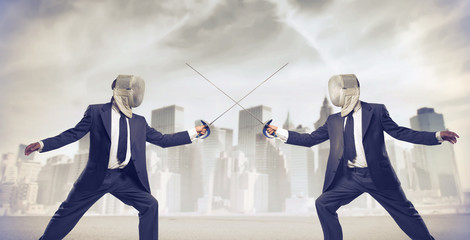

In [ ]:
Datei_Pfad = "Immobilien_Daten_Bern_AWK_TEST"
# Die Test Daten werden hier eingelesen
Immobilien_Test_Set = pd.read_csv(Datei_Pfad)
# Datum vorbereitung
Immobilien_Test_Set['DatumVerkauft'] = pd.to_datetime(Immobilien_Test_Set[['JahrVerkauft', 'MonatVerkauft']].assign(DAY=1).rename(columns={'JahrVerkauft': 'YEAR', 'MonatVerkauft': 'MONTH'}))
Immobilien_Test_Set['JahrVerkauft'] = pd.to_datetime(Immobilien_Test_Set[['JahrVerkauft']].assign(MONTH=1, DAY=1).rename(columns={'JahrVerkauft': 'YEAR'}))
# Der Entscheidungsbaum wird hier auf den Testdaten angewendet
Immobilien_Test_Daten = Immobilien_Test_Set[Immobilien_features]
Immobilien_Test_Daten = Immobilien_Test_Daten.apply(encoder.fit_transform)
Preis_Vorhersagen = Immobilien_Preis_Predictor.predict(Immobilien_Test_Daten.values)

# Dies benutzen wir nur im Falle eines Dashboard Wettbewerbs
# pd.DataFrame(Preis_Vorhersagen).to_csv('Preis_Vorhersagen', index=False)

In [ ]:
print("Explained Variance: ", round(explained_variance_score(Immobilien_Test_Set['Preis'], Preis_Vorhersagen), 3))
print("Median des absoluten Fehlers: ", round(median_absolute_error(Immobilien_Test_Set['Preis'], Preis_Vorhersagen)))

# versuchs_Nr += 1
# pd.DataFrame([explained_variance_score(Immobilien_Test_Set['Preis'], Preis_Vorhersagen)],columns = ["explained_variance_score"]).to_csv('Group_%s_Versuch%s.csv' %(str(group_id),str(versuchs_Nr)), index=False)



***
# Betrug aufspüren

Ihr Model erreicht nun gute Ergebnisse, aber sind diese gut genug, um mögliche Betrugsfällen aufzuspüren? Wir nehmen an, dass ein Betrugsfall vorliegt und die Immobilientransaktion näher durch das Steueramt geprüft werden sollte, wenn die Differenz zwischen dem tatsächlichen Immobilienpreis und der Preisvorhersage grösser ist als der Median des totalen Fehlers des Entscheidungsbaumes.

In den folgenden Zellen haben wir Ihnen einen kleinen, neuen Datensatz von 155 möglichen Betrugsfällen zur Verfügung gestellt. An diesem können sie testen, wie gut ihr Model die möglichen Betrugsfälle aufspürt. 


In [ ]:
Datei_Pfad = "Immobilien_Daten_Bern_AWK_TEST_Betrug"
Median_Absoluter_Fehler = median_absolute_error(Immobilien_Test_Set['Preis'], Preis_Vorhersagen)

# Die Daten werden hier eingelesen
Immobilien_Betrugs_Set = pd.read_csv(Datei_Pfad)
# Datum vorbereitung
Immobilien_Betrugs_Set['DatumVerkauft'] = pd.to_datetime(Immobilien_Betrugs_Set[['JahrVerkauft', 'MonatVerkauft']].assign(DAY=1).rename(columns={'JahrVerkauft': 'YEAR', 'MonatVerkauft': 'MONTH'}))
Immobilien_Betrugs_Set['JahrVerkauft'] = pd.to_datetime(Immobilien_Betrugs_Set[['JahrVerkauft']].assign(MONTH=1, DAY=1).rename(columns={'JahrVerkauft': 'YEAR'}))
# Analyse der neuen Daten
Immobilien_Betrugs_Daten = Immobilien_Betrugs_Set[Immobilien_features]
Immobilien_Betrugs_Daten = Immobilien_Betrugs_Daten.apply(encoder.fit_transform)
Preis_Vorhersagen_Betrug = Immobilien_Preis_Predictor.predict(Immobilien_Betrugs_Daten.values)

# Hier wird der Entscheid getroffen
Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] = (np.abs(Immobilien_Betrugs_Set['Betrugs_Preis'] - Preis_Vorhersagen_Betrug) > Median_Absoluter_Fehler)
[Möglicher_Betrugsfälle_Nein, Möglicher_Betrugsfälle_Ja] = Immobilien_Betrugs_Set['Betrug_GEFUNDEN'].value_counts().values

# Hier berechnen wir den nichtversteuerten Gewinn
Nicht_versteuerter_Gewinn_gefunden = (Immobilien_Betrugs_Set.loc[Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] == True]['Preis']
                                      - Immobilien_Betrugs_Set.loc[Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] == True]['Betrugs_Preis']).sum()
Nicht_versteuerter_Gewinn_nicht_gefunden = (Immobilien_Betrugs_Set.loc[Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] == False]['Preis']
                                            - Immobilien_Betrugs_Set.loc[Immobilien_Betrugs_Set['Betrug_GEFUNDEN'] == False]['Betrugs_Preis']).sum()

# Visualisierung
Plib.bardiagram_anzeigen(Nicht_versteuerter_Gewinn_gefunden, Nicht_versteuerter_Gewinn_nicht_gefunden)
print(f"Von 155 möglichen Betrugsfällen haben Sie {Möglicher_Betrugsfälle_Ja} gefunden und {Möglicher_Betrugsfälle_Nein} nicht gefunden.",
      f"Die Betrugsfällen, die Sie aufgespürt haben,\nhinterzogen total {Nicht_versteuerter_Gewinn_gefunden:,} CHF.")

## Glückwunsch!
Somit haben Sie der Stadt Neu-Bern einen guten Überblick geliefert über die Immobiliensituation und einen Algorithmus entwickelt, welcher Immobilienbetrug aufspüren kann. Dies sollte den Immobilienbetrug in der Zukunft verringern und gibt der Stadt Neu-Bern einen Anhaltspunkt, welche Immobilientransaktionen mit Argusaugen zu prüfen sind. 